In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
#Creates a urlretrieve object that turns data into a csv

from urllib.request import urlretrieve

urlretrieve(medical_charges_url, 'medical.csv')


('medical.csv', <http.client.HTTPMessage at 0x1620d0a5760>)

In [4]:
#Turns csv data into a table
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
#Gives metadata information about the table
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Gives statistical data about each numeric column (mean, std, min, max, etc)
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
#Now we have to visualize the data
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Setting the style of the graph
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [11]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [13]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

#Note: in the distribution of ages, its mostly uniform, but 18 and 19 year olds have approx double the normal amount

In [ ]:
fig = px.histogram(medical_df, x='bmi', marginal='box', color_discrete_sequence=['orange'], title='Dist of BMIs')
fig.update_layout(bargap=0.1)
fig.show()

#The distributions of BMIs is normal 
#Bc the dist of ages is uniform and dist of BMI is normal, then there is a 

In [20]:

fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()
#This creates a histogram of charges. The green represents the smokers
#Distribution skewed to the right meaning that there are big outliers

In [ ]:
#smoker analysis
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

THE REASON YOU DO DATA ANALYSIS IS TO MAKE SURE YOUR DATA MATCHES THE DISTRIBUTION OF THE POPULATION. IF YOUR SAMPLE DATA DOESN'T CORRECTLY REFLECT THE POPULATION, THEN IT'LL BE WRONG.

In [24]:
#Scatter plot of age vs charges (capture a relationship bwt the two)
px.scatter(medical_df,x='age', y='charges', color='smoker',title='Age vs Charges')

#From this chart, age and charges are related linearly

In [ ]:
#Gives the correleation coefficient (R-VALUE) of age vs charge (how much of the variability in charge can be explained by age)
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [ ]:
#Gives the correleation coefficient of bmi vs charge (how much of the variability in charge can be explained by bmi)
medical_df.charges.corr(medical_df.bmi)


0.19834096883362892

In [ ]:
#To determine the r of categorical data, you have to convert the categorical data into numeric data
#R^2 FOR SMOKERS

smoker_vals = {'no':0, 'yes':1} #This changes no in 0 and yes to 1
smoker_new_col = medical_df.smoker.map(smoker_vals) #Mapped 0s and 1s to create new col
medical_df.charges.corr(smoker_new_col)

0.7872514304984772

BELOW NOW IS THE BEGINNING OF THE MACHINE LEARNING
STARTING WITH LINEAR REGRESSION

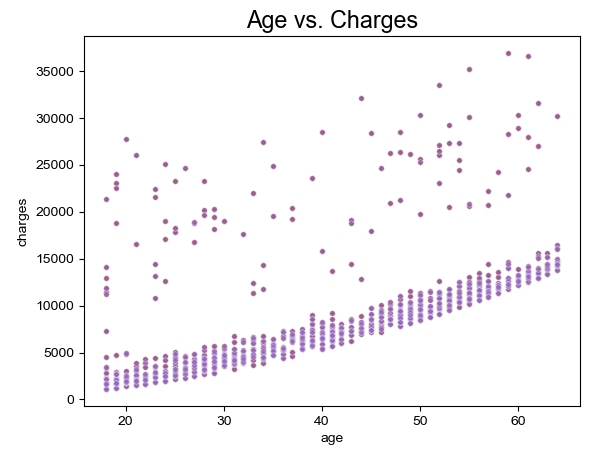

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no'] #Get rows with non smokers
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)
plt.show()

#This chart shows age vs charges of non smokers


In [35]:
def estimate_charges(age, w, b):
    return w * age + b

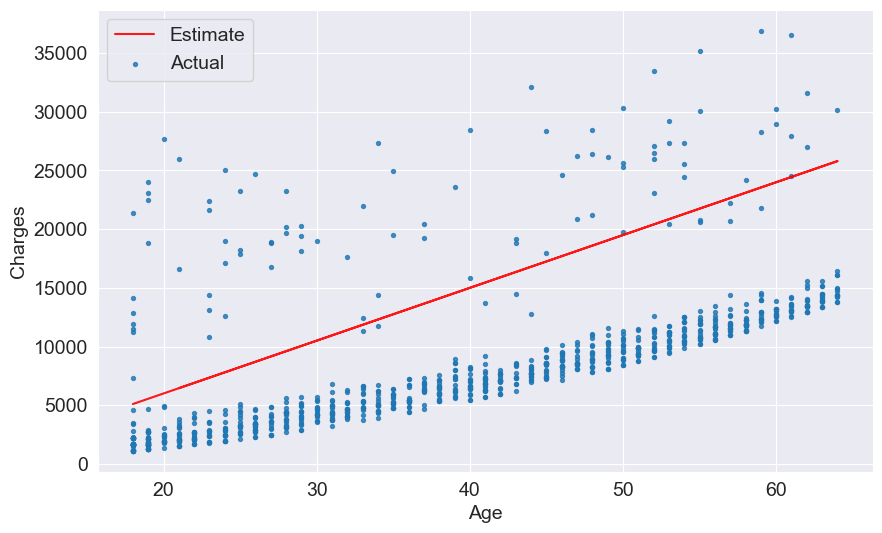

In [ ]:
    #A function that takes in linear regression parameters and plots the best fit line against the actual data
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9) #plotting the line and the scatter plot together
    plt.scatter(ages, target, s=8,alpha=0.8) #plotting the line and the scatter plot together
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    plt.show()


try_parameters(450, -3000)


In [42]:
import numpy as np

In [45]:
#Computing the root mean square error (RMSE)

def RMSE(targets, predicted): #The parameters must be numpy arrays or arrays that can be converted to numpy arrays
    return np.sqrt(np.mean(np.square(targets - predicted)))

In [43]:
w = 50
b = 100
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)


In [46]:
RMSE(targets, predicted)


8461.949562575493

In [ ]:
#Creating the linear regression model object
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [51]:
#non_smoker_df represents the rows with only non smokers
non_smoker_df.shape

input = non_smoker_df[['age']]  #Dimension: num of samples x 1 (note can't do single brackets, because that gives you a series with no 1 dimension)
targets = non_smoker_df.charges #Gives a num of samples x 1 array


In [52]:
#Using the linear regression model
model.fit(input, targets)

LinearRegression()

In [55]:
model.predict([[24],[25],[75]]) #Must of be a num of predictions x features size (bc there's only 1 feature here, it should be like 3x1 for example)

c:\Users\saket\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4322.55335138,  4589.80226421, 17952.24790577])

In [61]:
input.shape
predictions = model.predict(input)
predictions
#Can directly use inputs bc it has the requiste number of columns

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [63]:
predictions.shape #Outputs a 1d array of all the predicted values for each input

(1064,)

In [64]:
#compute the RMSE for this predicitons array
RMSE(targets,predictions)

4662.505766636395

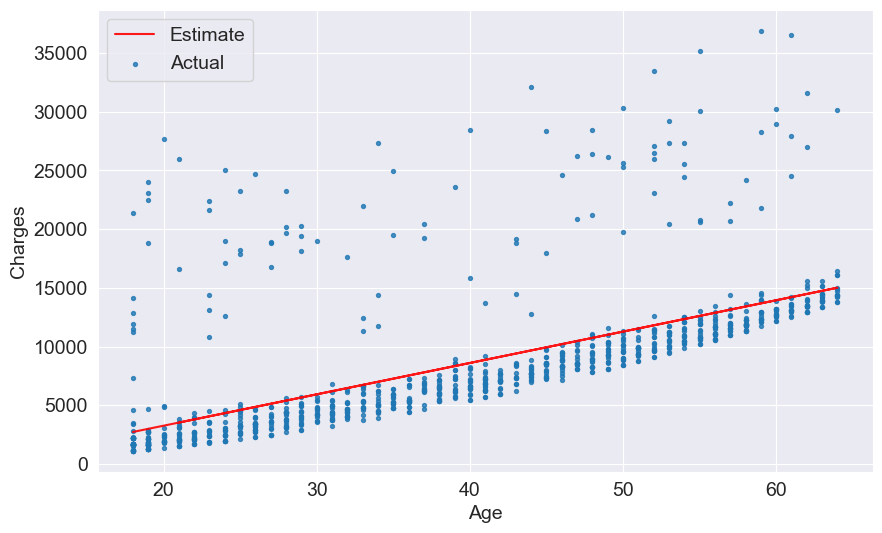

In [66]:
#w (the slope)
slope = model.coef_

#y-int
intercept = model.intercept_

try_parameters(slope,intercept)


LINEAR REGRESSION USING MULTIPLE FEATURES 
Note: Instead of outputting a line, a linear regression model with 2 featuers would output a plane in 3 dimensions

In [ ]:
#Get the inputs and targets arrays
inputs = non_smoker_df[['age','children']]
targets = non_smoker_df.charges

#Create the model and plug in data
model2 = LinearRegression().fit(inputs,targets)

#Generate predictions
predictions = model2.predict(inputs)

#Compute loss
loss = RMSE(targets, predictions)
print ('Loss: ', loss)


Loss:  4608.579056261982


In [74]:
#Now create compute the a linear regression using children, bmi, and age for the entire data set

#Inputs and target array
input = medical_df[['age','bmi','children']]
target = medical_df.charges

#Create the lin regression model
model3 = LinearRegression().fit(input, target)

#Create predictions
predictions = model3.predict(input)

#Compute loss
loss = RMSE(target,predictions)
print ('Loss: ', loss)



Loss:  11355.317901125973
